- Started on Oct 21
- To do the splines problem from HW2

In [1]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import numpy as np

In [ ]:
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * np.random.randn(50)
plt.plot(x, y, 'ro', ms=5)

In [ ]:
spl = UnivariateSpline(x, y)
xs = np.linspace(-3, 3, 1000)
plt.plot(x,y,'ro', xs, spl(xs), 'g')

In [ ]:
spl.set_smoothing_factor(0.5)
plt.plot(xs, spl(xs), 'b', lw=3)
plt.show()

In [2]:
data = np.loadtxt('glass_cleaned.txt')

In [ ]:
x_train = data[:,0]
y_train = data[:,1]

In [ ]:
plt.scatter(x_train,y_train)

In [3]:
# Sort the data according to the training data column
data_sorted = data[data[:,0].argsort()]

In [ ]:
data_sorted

In [4]:
# function: remove duplicate input variable entries by averaging corresponding output values
def groupby_mean(a):
    # Sort array by groupby column
    b = a[a[:,0].argsort()]

    # Get interval indices for the sorted groupby col
    idx = np.flatnonzero(np.r_[True,b[:-1,0]!=b[1:,0],True])

    # Get counts of each group and sum rows based on the groupings & hence averages
    counts = np.diff(idx)
    avg = np.add.reduceat(b[:,1:],idx[:-1],axis=0)/counts.astype(float)[:,None]

    # Finally concatenate for the output in desired format
    return np.c_[b[idx[:-1],0],avg]

In [5]:
data_sorted_dups_removed = groupby_mean(data_sorted)

In [ ]:
data_sorted_dups_removed

In [8]:
spline_10 = UnivariateSpline(data_sorted_dups_removed[:,0],data_sorted_dups_removed[:,1],s=10)
spline_250 = UnivariateSpline(data_sorted_dups_removed[:,0],data_sorted_dups_removed[:,1],s=250)
spline_500 = UnivariateSpline(data_sorted_dups_removed[:,0],data_sorted_dups_removed[:,1],s=500)
spline_1000 = UnivariateSpline(data_sorted_dups_removed[:,0],data_sorted_dups_removed[:,1],s=1000)

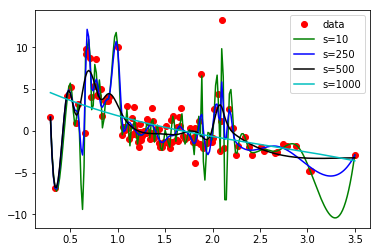

In [14]:
x_test = np.linspace(0.29, 3.50, 200)
plt.plot(data_sorted_dups_removed[:,0],data_sorted_dups_removed[:,1],'ro',label='data')
plt.plot(x_test, spline_10(x_test), 'g',label='s=10')
plt.plot(x_test, spline_250(x_test), 'b',label='s=250')
plt.plot(x_test, spline_500(x_test), 'k',label='s=500')
plt.plot(x_test, spline_1000(x_test), 'c',label='s=1000')
plt.legend()

#### Part 2: Dataset D
- $r(x) = cos(12 \pi x), 0 \leq x<1$
- $r(x) = x, 1\leq x \leq 2$

In [20]:
# Reading data
# First manually removed serial numbers and column labels to only leave 2 cols with values
# genfromtxt function enables converting txt to float which wasn't possible with np.loadtxt
d = np.genfromtxt('c2data_cleaned.csv', delimiter=',')

In [23]:
c =2
0<c and c<3

True

In [35]:
x = np.linspace(0,10,10)
x.shape[0]

10

In [36]:
def true_func(x):
    if 0<=x and x<1:
        return np.cos(12*np.pi*x)
    if 1<=x and x<=2:
        return x

In [37]:
v_true_func = np.vectorize(true_func)

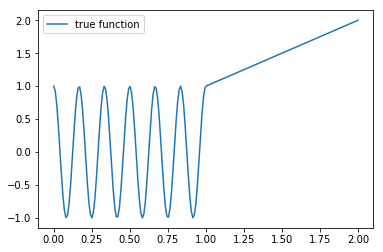

In [41]:
true_x = np.linspace(0.0, 2.0, 200)
true_y = v_true_func(true_x)
plt.plot(true_x,true_y,label='true function')
plt.legend()

In [42]:
d

array([[ 0.00250627,  0.98721906],
       [ 0.00501253,  1.18007139],
       [ 0.0075188 ,  0.68684631],
       [ 0.01002506,  1.05117844],
       [ 0.01253133,  1.08523088],
       [ 0.01503759,  0.95752102],
       [ 0.01754386,  0.79808872],
       [ 0.02005013,  1.09051423],
       [ 0.02255639,  0.64396966],
       [ 0.02506266,  0.41584232],
       [ 0.02756892,  0.55521698],
       [ 0.03007519,  0.58117939],
       [ 0.03258145,  0.36619007],
       [ 0.03508772,  0.24501827],
       [ 0.03759398,  0.11094207],
       [ 0.04010025,  0.29283053],
       [ 0.04260652,  0.16518765],
       [ 0.04511278, -0.32196913],
       [ 0.04761905,  0.07719629],
       [ 0.05012531, -1.24216069],
       [ 0.05263158, -0.07581035],
       [ 0.05513784, -0.29489505],
       [ 0.05764411, -0.56643553],
       [ 0.06015038, -0.64140925],
       [ 0.06265664, -0.9863293 ],
       [ 0.06516291, -0.35724989],
       [ 0.06766917, -0.94044739],
       [ 0.07017544, -0.30844977],
       [ 0.0726817 ,

In [43]:
spline_D = UnivariateSpline(d[:,0],d[:,1],s=30)

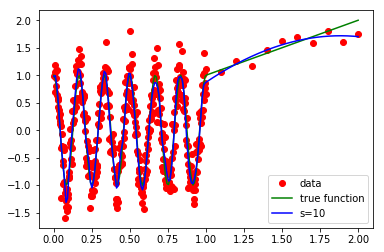

In [44]:
x_test_d = np.linspace(0.0, 2.0, 200)
plt.plot(d[:,0],d[:,1],'ro',label='data')
plt.plot(true_x,true_y,'g',label='true function')
plt.plot(x_test_d, spline_D(x_test_d), 'b',label='s=10')
plt.legend()